#Assignment-5 by- Aditya Raj Srivastava

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual_Income_k,Spending_Score_1to100
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [75]:
df.shape

(200, 5)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   CustomerID             200 non-null    int64 
 1   Gender                 200 non-null    object
 2   Age                    200 non-null    int64 
 3   Annual_Income_k        200 non-null    int64 
 4   Spending_Score_1to100  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [77]:
df.corr()

<ipython-input-77-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,CustomerID,Age,Annual_Income_k,Spending_Score_1to100
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual_Income_k,0.977548,-0.012398,1.000000,0.009903
Spending_Score_1to100,0.013835,-0.327227,0.009903,1.000000


<ipython-input-78-96ac31f4967e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='Blues')


<Axes: >

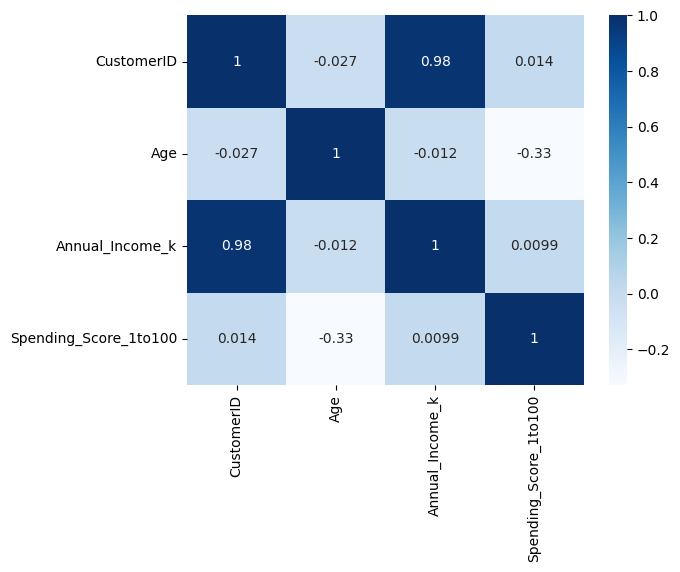

In [78]:
sns.heatmap(df.corr(), annot=True, cmap='Blues')

In [79]:
df.describe()

,CustomerID,Age,Annual_Income_k,Spending_Score_1to100
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [80]:
# since CustomerID is of no use we will drop it

df = df.drop(['CustomerID'], axis=1)
df.head()

,Gender,Age,Annual_Income_k,Spending_Score_1to100
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [81]:
df.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

Have 1 categorial column.

Unlabbled data.

No target column hence no outlier treament to be done for it.







##Data Preprocessing

No null values

In [82]:
df.isnull().sum()

Gender                   0
Age                      0
Annual_Income_k          0
Spending_Score_1to100    0
dtype: int64

<Axes: >

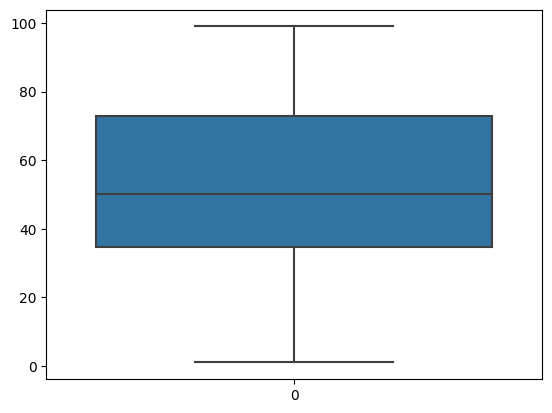

In [83]:
sns.boxplot(df.Spending_Score_1to100)

No outliers

<Axes: >

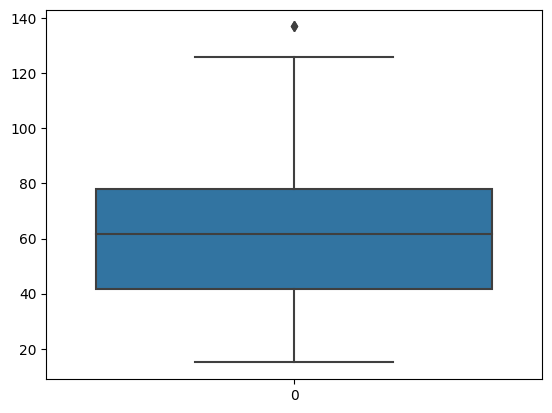

In [84]:
sns.boxplot(df.Annual_Income_k)    #Outlier is present

In [85]:
q1 = df.Annual_Income_k.quantile(0.25)  #Q1
q3 = df.Annual_Income_k.quantile(0.75)  #Q3
print("Q1 = ",q1," Q3 = ",q3)
IQR = q3-q1
print("IQR = ",IQR)
upper_limit= q3+1.5*IQR
print("upper_limit = ",upper_limit)
lower_limit= q1-1.5*IQR
print("lower_limit = ",lower_limit)

Q1 =  41.5  Q3 =  78.0
IQR =  36.5
upper_limit =  132.75
lower_limit =  -13.25


In [86]:
df.median()

<ipython-input-86-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


Age                      36.0
Annual_Income_k          61.5
Spending_Score_1to100    50.0
dtype: float64

In [87]:
df.Annual_Income_k = np.where(df.Annual_Income_k>upper_limit, 61.5 ,df.Annual_Income_k)

<Axes: >

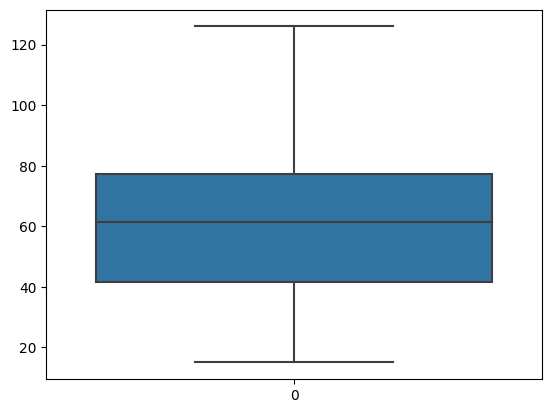

In [88]:
sns.boxplot(df.Annual_Income_k)

Outlier is removed



###Encoding Gender Column

In [89]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [90]:
df.Gender = le.fit_transform(df.Gender)

In [91]:
df.head()

,Gender,Age,Annual_Income_k,Spending_Score_1to100
0,1,19,15.0,39
1,1,21,15.0,81
2,0,20,16.0,6
3,0,23,16.0,77
4,0,31,17.0,40


###Scaling

In [92]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

In [93]:
df_scaled = pd.DataFrame(scale.fit_transform(df), columns=df.columns)
df_scaled.head()

,Gender,Age,Annual_Income_k,Spending_Score_1to100
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.009009,0.051020
3,0.0,0.096154,0.009009,0.775510
4,0.0,0.250000,0.018018,0.397959


##Clustering -KMeans

In [94]:
from sklearn import cluster

In [95]:
# For Elbow Graph

error=[]
for i in range(1,11):
  kmeans=cluster.KMeans(n_clusters=i, init = 'k-means++', random_state=0)
  kmeans.fit(df_scaled)
  error.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [96]:
error

[87.64248645238291,
 38.256261727718496,
 30.53615452035327,
 23.37397528270042,
 20.102172077784857,
 17.128172918518988,
 14.850573520364879,
 12.608723763869847,
 10.917668890407121,
 9.591940516007261]

Text(0, 0.5, 'Error')

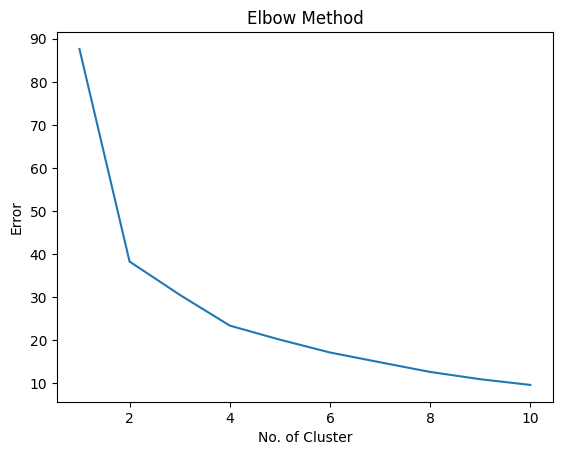

In [97]:
plt.plot(range(1,11), error)
plt.title("Elbow Method")
plt.xlabel("No. of Cluster")
plt.ylabel("Error")

Here we have to take k = 4 => 4 clusters as after 4 the graph stopped bending.

In [98]:
km_model = cluster.KMeans(n_clusters= 4, init = 'k-means++', random_state=0)

In [99]:
km_model.fit(df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [100]:
prediction = km_model.predict(df_scaled)
prediction

array([3, 3, 2, 1, 1, 1, 2, 1, 0, 1, 0, 1, 2, 1, 0, 3, 2, 3, 0, 1, 0, 3,
       2, 3, 2, 3, 2, 3, 2, 1, 0, 1, 0, 3, 2, 1, 2, 1, 2, 1, 2, 3, 0, 1,
       2, 1, 2, 1, 1, 1, 2, 3, 1, 0, 2, 0, 2, 0, 1, 0, 0, 3, 2, 2, 0, 3,
       2, 2, 3, 1, 0, 2, 2, 2, 0, 3, 2, 0, 1, 2, 0, 3, 0, 2, 1, 0, 2, 1,
       1, 2, 2, 3, 0, 2, 1, 3, 2, 1, 0, 3, 1, 2, 0, 3, 0, 1, 2, 0, 0, 0,
       0, 1, 2, 3, 1, 1, 2, 2, 2, 2, 3, 2, 1, 3, 1, 1, 0, 3, 0, 3, 0, 3,
       1, 1, 0, 1, 2, 3, 0, 1, 2, 3, 1, 1, 0, 3, 0, 1, 2, 3, 0, 3, 2, 1,
       2, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 2, 3, 0, 3, 0, 3, 2, 1,
       0, 3, 0, 3, 2, 1, 0, 1, 2, 3, 2, 3, 2, 1, 2, 1, 0, 1, 2, 1, 2, 3,
       0, 3], dtype=int32)

In [101]:
# Test model with random values

km_model.predict([[1.0, 0.019231, 0.000000, 0.387755]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([3], dtype=int32)

In [102]:
km_model.predict([[0.0, 0.096154, 0.016393, 0.816327]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1], dtype=int32)